In [1]:
import pandas as pd
import numpy as np
import ast

import matplotlib.pyplot as plt
import seaborn as sns

## Hierarchical Clustering

In [2]:
df = pd.read_csv('data_with_embeddings.csv')
df['embedding'] = df['embedding'].apply(ast.literal_eval)
embeddings_np = np.array(df['embedding'].to_list()).astype('float32')
print(embeddings_np[0])

[ 0.00057364 -0.03659058  0.03225708 ... -0.03070068  0.01863098
 -0.01544189]


In [3]:
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2, random_state=0).fit_transform(embeddings_np)

# palette = sns.color_palette("husl", len(df['Cluster'].unique()))
# ax = sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=np.array(df['Cluster'].to_list()), palette=palette)
# sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

In [4]:
# Rescale the embeddings
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings_np)
embeddings_scaled.shape

(156, 1024)

Text(0, 0.5, 'Euclidean distance')

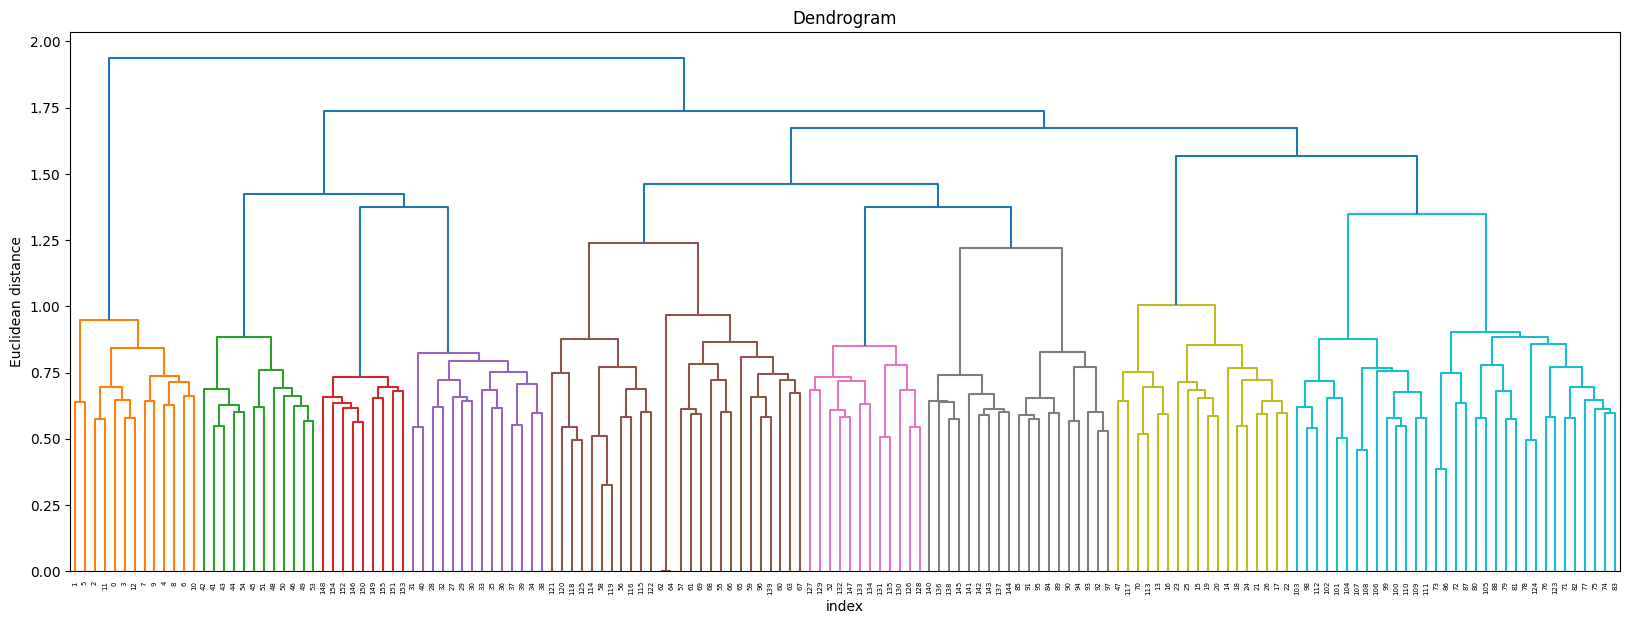

In [5]:
import scipy.cluster.hierarchy as sc
# Plot dendrogram
plt.figure(figsize=(20, 7))
plt.title("Dendrograms")

# Create dendrogram
sc.dendrogram(sc.linkage(embeddings_np, method='ward'))

plt.title('Dendrogram')
plt.xlabel('index')
plt.ylabel('Euclidean distance')

In [6]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

clf = AgglomerativeClustering(n_clusters=None,distance_threshold=1)
clf.fit(embeddings_np)

labels1 = clf.labels_
print(labels1)
df['Cluster_agglo'] = labels1

[ 1  1  1  1  1  1  1  1  1  1  1  1  1 12  5  5 12  5  5  5  5  5  5  5
  5  5  5  9  9  9  9  9  9  9  9  9  9  9  9  9  9  6  6  6  6  6  6 12
  6  6  6  6  3  6  6  0 10  0 10  0  0  0  0  0  0  0  0  0  0  0 12  2
  2  2  2  2  2  2  2  2  2  2  2  2  7  7  2  2  2  7  7  7  7  7  7  7
  0  7  4  4  4  4  4  4  4  2  4  4  4  4  4  4  4 12 10 10 10 12 10 10
 10 10 10  2  2 10  3  3  3  3  3  3  3  3  3  3 11 11 11  0 11 11 11 11
 11 11  8  3  8  8  8  8  8  8  8  8]


In [7]:
one = df[df['Cluster_agglo'] == 1]
one.head()

,Sentence,Topic,embedding,Cluster_agglo
0,Dogs are known as man's best friend.,Dogs,"[0.0005736351013183594, -0.036590576171875, 0....",1
1,My dog loves playing fetch in the backyard,Dogs,"[-0.028839111328125, 0.00765228271484375, 0.01...",1
2,Some dogs are trained to assist people with di...,Dogs,"[-0.024169921875, 0.01540374755859375, 0.01120...",1
3,Labrador Retrievers are popular for their frie...,Dogs,"[0.0041656494140625, -0.004886627197265625, 0....",1
4,Puppies require a lot of attention and care,Dogs,"[-0.055419921875, -0.003292083740234375, 0.037...",1


In [8]:
two = df[df['Cluster_agglo'] == 2]
three = df[df['Cluster_agglo'] == 3]
four = df[df['Cluster_agglo'] == 4]
five = df[df['Cluster_agglo'] == 5]
six = df[df['Cluster_agglo'] == 6]
seven = df[df['Cluster_agglo'] == 7]
eight = df[df['Cluster_agglo'] == 8]
nine = df[df['Cluster_agglo'] == 9]
ten = df[df['Cluster_agglo'] == 10]
eleven = df[df['Cluster_agglo'] == 11]


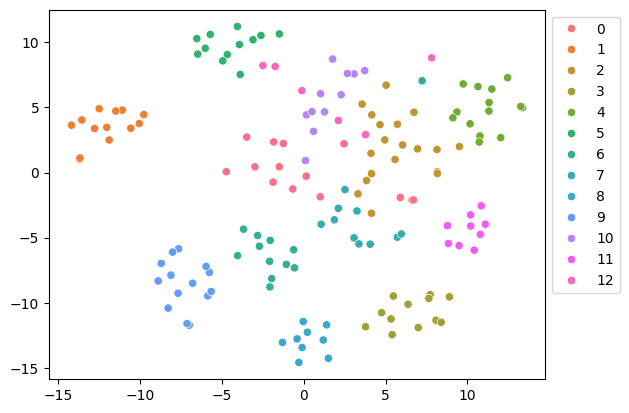

In [9]:
palette = sns.color_palette("husl", len(df['Cluster_agglo'].unique()))
ax = sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=np.array(df['Cluster_agglo'].to_list()), palette=palette, )
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

In [10]:
# Divisive Clustering
from HiPart.clustering import DePDDP

clf = DePDDP(max_clusters_number=12).fit(embeddings_np)

labels2 = clf.labels_
# print(labels2)
df['Cluster_div'] = labels2

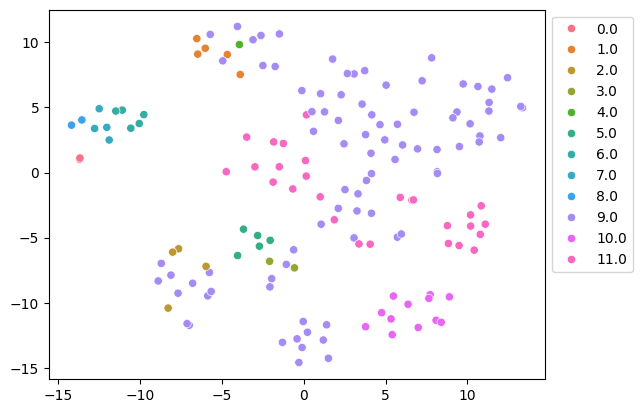

In [11]:
palette = sns.color_palette("husl", len(df['Cluster_div'].unique()))
ax = sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=np.array(df['Cluster_div'].to_list()), palette=palette, )
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

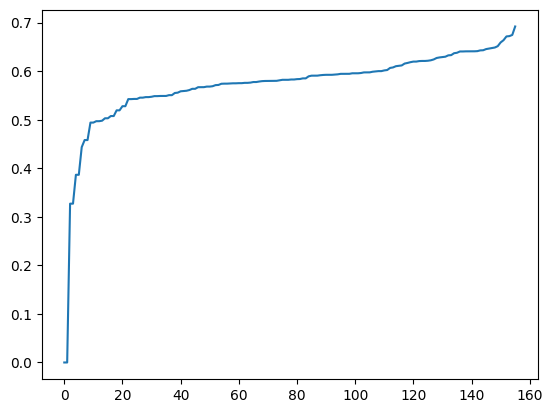

In [12]:
%matplotlib inline
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(embeddings_np)
distances, indices = nbrs.kneighbors(embeddings_np)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [13]:
from sklearn.cluster import DBSCAN

clf = DBSCAN(eps=0.58, min_samples=3)
clf.fit_predict(embeddings_np)
labels2 = clf.labels_
df['Cluster_db'] = labels2
print(labels2)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0 -1  0 -1  0  0 -1 -1 -1
 -1  1  1 -1 -1  1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2
 -1  3  2  2 -1 -1  2 -1 -1 -1 -1  2  0  3  3 -1 -1  3 -1  3  4  4 -1  3
  3  4  6  5  5  6 -1  6  6 -1 -1  5  5 -1  5 -1  6  2  2  2  2  2  2  2
  2 -1  2 -1  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


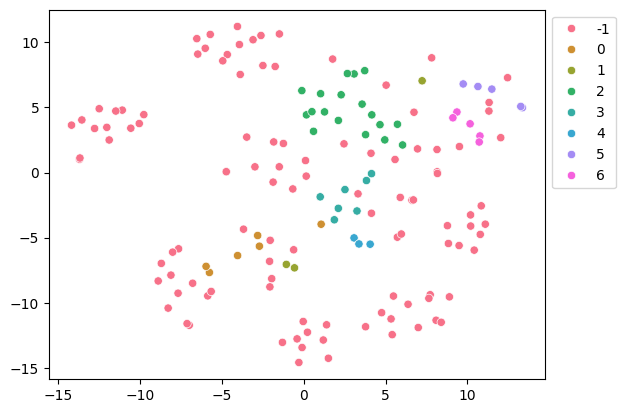

In [14]:
palette = sns.color_palette("husl", len(df['Cluster_db'].unique()))
ax = sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=np.array(df['Cluster_db'].to_list()), palette=palette)
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

In [15]:
# OPTICS 
from sklearn.cluster import OPTICS

cluster = OPTICS(min_samples=4, eps=0.58, metric='euclidean', cluster_method='dbscan', algorithm='brute', xi=0.05)
ypred = cluster.fit_predict(embeddings_np)
df['Cluster_op'] = ypred
print(ypred)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1  3  3 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1  0  1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  0 -1 -1  0 -1  2 -1 -1 -1  2
 -1 -1 -1 -1 -1  4 -1  4  4 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1
  1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


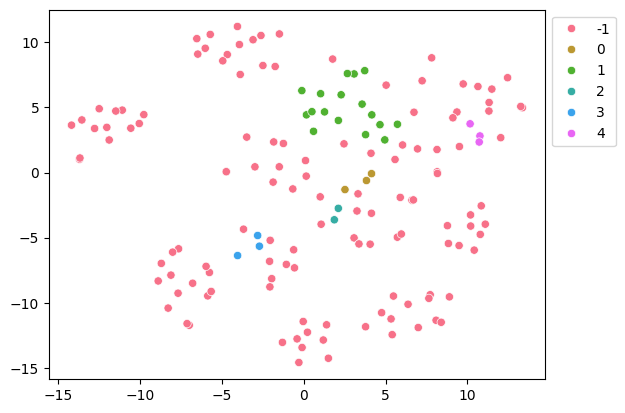

In [16]:
palette = sns.color_palette("husl", len(df['Cluster_op'].unique()))
ax = sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=np.array(df['Cluster_op'].to_list()), palette=palette)
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

In [17]:
cluster.reachability_[cluster.ordering_]

array([       inf, 0.6501429 , 0.64064787, 0.63018017, 0.63018017,
       0.6330256 , 0.64064787, 0.64363117, 0.64577567, 0.64577567,
       0.65912264, 0.66001528, 0.60292477, 0.60292477, 0.60292477,
       0.60770517, 0.59493013, 0.59493013, 0.59361391, 0.58932504,
       0.55568793, 0.55568793, 0.58929324, 0.58219394, 0.55960375,
       0.55960375, 0.55960375, 0.56910985, 0.52999175, 0.52999175,
       0.5576264 , 0.5576264 , 0.5576264 , 0.56703278, 0.57122357,
       0.57158081, 0.57401409, 0.57675823, 0.57764933, 0.57764933,
       0.58219394, 0.58929324, 0.58932504, 0.58932504, 0.57832395,
       0.58997867, 0.58997867, 0.56898089, 0.56898089, 0.58353275,
       0.58497369, 0.58497369, 0.58497369, 0.5907524 , 0.59216031,
       0.59239487, 0.59741821, 0.59820545, 0.59883666, 0.6015556 ,
       0.60349303, 0.59527775, 0.5847567 , 0.5847567 , 0.57944086,
       0.57944086, 0.58649087, 0.58649087, 0.58649087, 0.58305626,
       0.58232412, 0.58232412, 0.58539614, 0.58600025, 0.59031

## Evaluation. 

In [18]:
contingency_agglo = pd.crosstab(df['Topic'], df['Cluster_agglo'])
print(contingency_agglo)

Cluster_agglo  0   1   2   3   4   5   6   7   8   9   10  11  12
Topic                                                            
Books           1   0   3   0   0   0   0  10   0   0   0   0   0
Cuisine         0   0   0   0   0   0   0   0   0  14   0   0   0
Dogs            0  13   0   0   0   0   0   0   0   0   0   0   0
Education       1   0   0   0   0   0   0   0   0   0   0   9   0
Environment     0   0   0  10   0   0   0   0   0   0   0   0   0
Fashion         0   0   0   1   0   0   0   0   9   0   0   0   0
Football        0   0   0   0   0  12   0   0   0   0   0   0   2
Gaming          0   0   2   0   0   0   0   0   0   0   9   0   2
Movies          0   0  13   0   0   0   0   0   0   0   0   0   1
Music           0   0   1   0  14   0   0   0   0   0   0   0   0
Technology     13   0   0   0   0   0   0   0   0   0   2   0   0
Travel          0   0   0   1   0   0  12   0   0   0   0   0   1


In [19]:
contingency_div = pd.crosstab(df['Topic'], df['Cluster_div'])
contingency_div

Cluster_div,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
Topic,,,,,,,,,,,,
Books,0,0,0,0,0,0,0,0,0,10,0,4
Cuisine,0,0,4,0,0,0,0,0,0,10,0,0
Dogs,2,0,0,0,0,0,5,4,2,0,0,0
Education,0,0,0,0,0,0,0,0,0,0,0,10
Environment,0,0,0,0,0,0,0,0,0,0,10,0
Fashion,0,0,0,0,0,0,0,0,0,9,1,0
Football,0,5,0,0,1,0,0,0,0,8,0,0
Gaming,0,0,0,0,0,0,0,0,0,13,0,0
Movies,0,0,0,0,0,0,0,0,0,14,0,0


In [20]:
contingency_db = pd.crosstab(df['Topic'], df['Cluster_db'])
contingency_db

Cluster_db,-1,0,1,2,3,4,5,6
Topic,,,,,,,,
Books,4,1,0,0,6,3,0,0
Cuisine,12,2,0,0,0,0,0,0
Dogs,13,0,0,0,0,0,0,0
Education,10,0,0,0,0,0,0,0
Environment,10,0,0,0,0,0,0,0
Fashion,10,0,0,0,0,0,0,0
Football,14,0,0,0,0,0,0,0
Gaming,2,0,0,11,0,0,0,0
Movies,7,0,0,6,1,0,0,0


In [21]:
contingency_op = pd.crosstab(df['Topic'], df['Cluster_op'])
contingency_op

Cluster_op,-1,0,1,2,3,4
Topic,,,,,,
Books,10,2,0,2,0,0
Cuisine,14,0,0,0,0,0
Dogs,13,0,0,0,0,0
Education,10,0,0,0,0,0
Environment,10,0,0,0,0,0
Fashion,10,0,0,0,0,0
Football,14,0,0,0,0,0
Gaming,2,0,11,0,0,0
Movies,8,1,5,0,0,0


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
def evaluation(contingency_table):
    precision_per_topic = {}
    for topic in contingency_table.index:
        # cluster with the maximum number of sentences per topic
        correct_cluster = contingency_table.loc[topic].idxmax()
        
        # true positives
        true_positives = contingency_table.loc[topic, correct_cluster]
        
        # total predicted positives 
        predicted_positives = contingency_table[correct_cluster].sum()
        
        # Precision per topic
        precision = true_positives / predicted_positives if predicted_positives > 0 else 0
        precision_per_topic[topic] = precision

        # DataFrame
    precision_df = pd.DataFrame(list(precision_per_topic.items()), columns=['Topic', 'Precision'])

        # precision per topic
    return precision_df


In [24]:
print('Agglomerative Clustering')
print(evaluation(contingency_agglo))

Agglomerative Clustering
          Topic  Precision
0         Books   1.000000
1       Cuisine   1.000000
2          Dogs   1.000000
3     Education   1.000000
4   Environment   0.833333
5       Fashion   1.000000
6      Football   1.000000
7        Gaming   0.818182
8        Movies   0.684211
9         Music   1.000000
10   Technology   0.866667
11       Travel   1.000000


In [25]:
print('Divisive Clustering')
print(evaluation(contingency_div))

Divisive Clustering
          Topic  Precision
0         Books   0.116279
1       Cuisine   0.116279
2          Dogs   1.000000
3     Education   0.357143
4   Environment   0.833333
5       Fashion   0.104651
6      Football   0.093023
7        Gaming   0.151163
8        Movies   0.162791
9         Music   0.174419
10   Technology   0.500000
11       Travel   0.069767


In [26]:
print('DBSCAN')
print(evaluation(contingency_db))

DBSCAN
          Topic  Precision
0         Books   0.857143
1       Cuisine   0.110092
2          Dogs   0.119266
3     Education   0.091743
4   Environment   0.091743
5       Fashion   0.091743
6      Football   0.128440
7        Gaming   0.611111
8        Movies   0.064220
9         Music   0.045872
10   Technology   0.128440
11       Travel   0.073394


In [27]:
print('OPTICS')
print(evaluation(contingency_op))

OPTICS
          Topic  Precision
0         Books   0.078125
1       Cuisine   0.109375
2          Dogs   0.101562
3     Education   0.078125
4   Environment   0.078125
5       Fashion   0.078125
6      Football   0.109375
7        Gaming   0.647059
8        Movies   0.062500
9         Music   0.093750
10   Technology   0.109375
11       Travel   0.085938


In [28]:
def total_precision(contingency_table):
    total_true_positives = 0
    total_predicted_positives = 0
    for topic in contingency_table.index:
        # cluster with the maximum number of senteNCES
        correct_cluster = contingency_table.loc[topic].idxmax()
        
        # Calculate true positives
        true_positives = contingency_table.loc[topic, correct_cluster]
        
        #  total predicted positives 
        predicted_positives = contingency_table[correct_cluster].sum()
        
       
        total_true_positives += true_positives
        total_predicted_positives += predicted_positives

    #  micro-averaged precision
    micro_avg_precision = total_true_positives / total_predicted_positives if total_predicted_positives > 0 else 0
    return micro_avg_precision


In [29]:
print('AgglomerativeClustering:', total_precision(contingency_agglo))

AgglomerativeClustering: 0.92


In [30]:
print('DivisiveClustering:', total_precision(contingency_div))

DivisiveClustering: 0.16294349540078842


In [31]:
print('DBSCAN:', total_precision(contingency_db))

DBSCAN: 0.10762331838565023


In [32]:
print('OPTICS:', total_precision(contingency_op))

OPTICS: 0.09614035087719298


In [33]:
data = df['Sentence'].to_list()
label_counts = pd.Series(labels2).value_counts()
for labels1, text in zip(labels2, data):
    print(labels1, text)


-1 Dogs are known as man's best friend.
-1 My dog loves playing fetch in the backyard
-1 Some dogs are trained to assist people with disabilities
-1 Labrador Retrievers are popular for their friendly demeanor
-1 Puppies require a lot of attention and care
-1 Walking my dog is a daily routine I enjoy
-1 Dog parks provide a great opportunity for socialization
-1 Dog owners should be responsible for cleaning up after their pets
-1 Training a dog requires patience and consistency
-1 Dog grooming is an important part of pet care
-1 Adopting a rescue dog can be a rewarding experience
-1 Dog training classes help improve obedience and behavior.
-1 Dog breeds vary widely in size, temperament, and energy levels
-1 Football, or soccer, is the most popular sport worldwide.
-1 Lionel Messi is considered one of the greatest footballers of all time
-1 Watching a live football match at the stadium is exhilarating.
-1 The World Cup is held every four years and attracts millions of viewers.
-1 Football

In [34]:
def topics(contingency_table):
    num_topics = contingency_table.shape[0]  # topics
    num_clusters = contingency_table.shape[1]  # clusters

   
    N = np.zeros((num_topics, num_clusters), dtype=int)

    for topic_idx in range(num_topics):
        for cluster_idx in range(num_clusters):
            if contingency_table.iloc[topic_idx, cluster_idx] > 0:
                #  topic `topic_idx` assigned to `cluster_idx`
                actual_count = contingency_table.iloc[topic_idx, cluster_idx]
                
                # correct cluster for this topic
                correct_cluster = contingency_table.iloc[topic_idx].idxmax()
                
                # If the current cluster is not the correct one, misclassification
                if cluster_idx != correct_cluster:
                    N[topic_idx, cluster_idx] = actual_count

    # Convert the matrix to a DataFrame 
    N_df = pd.DataFrame(N, index=contingency_table.index, columns=contingency_table.columns)
    return N_df

print(topics(contingency_agglo))

Cluster_agglo  0   1   2   3   4   5   6   7   8   9   10  11  12
Topic                                                            
Books           1   0   3   0   0   0   0   0   0   0   0   0   0
Cuisine         0   0   0   0   0   0   0   0   0   0   0   0   0
Dogs            0   0   0   0   0   0   0   0   0   0   0   0   0
Education       1   0   0   0   0   0   0   0   0   0   0   0   0
Environment     0   0   0   0   0   0   0   0   0   0   0   0   0
Fashion         0   0   0   1   0   0   0   0   0   0   0   0   0
Football        0   0   0   0   0   0   0   0   0   0   0   0   2
Gaming          0   0   2   0   0   0   0   0   0   0   0   0   2
Movies          0   0   0   0   0   0   0   0   0   0   0   0   1
Music           0   0   1   0   0   0   0   0   0   0   0   0   0
Technology      0   0   0   0   0   0   0   0   0   0   2   0   0
Travel          0   0   0   1   0   0   0   0   0   0   0   0   1


In [35]:
print(topics(contingency_div))

Cluster_div  0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  \
Topic                                                                           
Books           0     0     0     0     0     0     0     0     0     0     0   
Cuisine         0     0     4     0     0     0     0     0     0     0     0   
Dogs            2     0     0     0     0     0     0     4     2     0     0   
Education       0     0     0     0     0     0     0     0     0     0     0   
Environment     0     0     0     0     0     0     0     0     0     0     0   
Fashion         0     0     0     0     0     0     0     0     0     0     1   
Football        0     5     0     0     1     0     0     0     0     0     0   
Gaming          0     0     0     0     0     0     0     0     0     0     0   
Movies          0     0     0     0     0     0     0     0     0     0     0   
Music           0     0     0     0     0     0     0     0     0     0     0   
Technology      0     0     

In [36]:
print(topics(contingency_db))

Cluster_db   -1   0   1   2   3   4   5   6
Topic                                      
Books         4   1   0   0   6   3   0   0
Cuisine      12   2   0   0   0   0   0   0
Dogs         13   0   0   0   0   0   0   0
Education    10   0   0   0   0   0   0   0
Environment  10   0   0   0   0   0   0   0
Fashion      10   0   0   0   0   0   0   0
Football     14   0   0   0   0   0   0   0
Gaming        2   0   0  11   0   0   0   0
Movies        7   0   0   6   1   0   0   0
Music         5   0   0   0   0   0   5   5
Technology   14   0   0   1   0   0   0   0
Travel        8   3   3   0   0   0   0   0


In [37]:
print(topics(contingency_op))

Cluster_op   -1   0   1   2   3   4
Topic                              
Books        10   2   0   2   0   0
Cuisine      14   0   0   0   0   0
Dogs         13   0   0   0   0   0
Education    10   0   0   0   0   0
Environment  10   0   0   0   0   0
Fashion      10   0   0   0   0   0
Football     14   0   0   0   0   0
Gaming        2   0  11   0   0   0
Movies        8   1   5   0   0   0
Music        12   0   0   0   0   3
Technology   14   0   1   0   0   0
Travel       11   0   0   0   3   0


In [38]:
from transformers import pipeline

generator = pipeline('text2text-generation', model="t5-small")
clusters = {
    "one": df[df['Cluster_agglo'] == 1]['Sentence'].to_list(),
    "two": df[df['Cluster_agglo'] == 2]['Sentence'].to_list(),
    "three": df[df['Cluster_agglo'] == 3]['Sentence'].to_list(),
    "four": df[df['Cluster_agglo'] == 4]['Sentence'].to_list(),
    "five": df[df['Cluster_agglo'] == 5]['Sentence'].to_list(),
    "six": df[df['Cluster_agglo'] == 6]['Sentence'].to_list(),
    "seven": df[df['Cluster_agglo'] == 7]['Sentence'].to_list(),
    "eight": df[df['Cluster_agglo'] == 8]['Sentence'].to_list(),
    "nine": df[df['Cluster_agglo'] == 9]['Sentence'].to_list(),
    "ten": df[df['Cluster_agglo'] == 10]['Sentence'].to_list(),
    "eleven": df[df['Cluster_agglo'] == 11]['Sentence'].to_list(),
}

/home/oumar/Projects/NLP/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter


for cluster_name, sentences in clusters.items():
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
    X = vectorizer.fit_transform(sentences)
    terms = vectorizer.get_feature_names_out()
    word_counts = X.sum(axis=0).A1
    word_freq = dict(zip(terms, word_counts))
    common_words = Counter(word_freq).most_common(1)
    print(f"{cluster_name}: {', '.join([word for word, freq in common_words])}")


one: dog
two: movie
three: sustainable
four: music
five: football
six: traveling
seven: reading
eight: fashion
nine: food
ten: game
eleven: education


In [40]:
for cluster, sentences in clusters.items():
    prompt = "Provide one word that summarizes the content: " + " ".join(sentences)
    generated = generator(prompt, max_new_tokens=5, num_return_sequences=1, do_sample=False)
    generated_text = generated[0]['generated_text'].strip()
    words = generated_text.split()
    if words:
        label = max(words, key=len)  
    else:
        label = "Unknown"
    
    print(f"{cluster_name} Label: {label}")

eleven Label: dog
eleven Label: Action
eleven Label: environmental
eleven Label: music
eleven Label: Lionel
eleven Label: explore
eleven Label: Non-fiction
eleven Label: Fashion
eleven Label: renowned
eleven Label: platforms
eleven Label: development.


## Cosine similarity

In [41]:
from sklearn.metrics.pairwise import cosine_similarity

In [42]:
# Embeddings for each cluster
one_embed = embeddings_np[df['Cluster_agglo'] == 1]
two_embed = embeddings_np[df['Cluster_agglo'] == 2]
three_embed = embeddings_np[df['Cluster_agglo'] == 3]
four_embed = embeddings_np[df['Cluster_agglo'] == 4]
five_embed = embeddings_np[df['Cluster_agglo'] == 5]
six_embed = embeddings_np[df['Cluster_agglo'] == 6]
seven_embed = embeddings_np[df['Cluster_agglo'] == 7]
eight_embed = embeddings_np[df['Cluster_agglo'] == 8]
nine_embed = embeddings_np[df['Cluster_agglo'] == 9]
ten_embed = embeddings_np[df['Cluster_agglo'] == 10]
eleven_embed = embeddings_np[df['Cluster_agglo'] == 11]

# sentence embeddings
one_sentences = df[df['Cluster_agglo'] == 1]['Sentence'].to_list()
one_sentences = one_sentences[:10]
two_sentences = df[df['Cluster_agglo'] == 2]['Sentence'].to_list()
two_sentences = two_sentences[:10]
three_sentences = df[df['Cluster_agglo'] == 3]['Sentence']
four_sentences = df[df['Cluster_agglo'] == 4]['Sentence']
five_sentences = df[df['Cluster_agglo'] == 5]['Sentence']
six_sentences = df[df['Cluster_agglo'] == 6]['Sentence']
seven_sentences = df[df['Cluster_agglo'] == 7]['Sentence']
eight_sentences = df[df['Cluster_agglo'] == 8]['Sentence']
nine_sentences = df[df['Cluster_agglo'] == 9]['Sentence']
ten_sentences = df[df['Cluster_agglo'] == 10]['Sentence']
eleven_sentences = df[df['Cluster_agglo'] == 11]['Sentence']

In [43]:
M = np.vstack([one_embed, two_embed])
M

array([[ 0.00057364, -0.03659058,  0.03225708, ..., -0.03070068,
         0.01863098, -0.01544189],
       [-0.02883911,  0.00765228,  0.01556396, ..., -0.00525665,
        -0.00071049,  0.03411865],
       [-0.02416992,  0.01540375,  0.01120758, ..., -0.03601074,
        -0.00746918, -0.00671768],
       ...,
       [-0.0243988 ,  0.02297974,  0.04290771, ...,  0.01004028,
         0.00122261, -0.03381348],
       [-0.00904083,  0.0214386 ,  0.04507446, ...,  0.00442505,
         0.01029205, -0.01870728],
       [-0.05291748, -0.00546646,  0.01378632, ..., -0.00130367,
         0.01136017,  0.01087952]], dtype=float32)

In [49]:
similarity_matrix = cosine_similarity(M, M)
# print(similarity_matrix)
sentences = one_sentences[:10] + two_sentences[:10]


similarities_i_j = similarity_matrix[:10, 10:]
print(similarities_i_j)
top_indices = np.unravel_index(np.argsort(similarities_i_j.ravel())[-10:], similarities_i_j.shape)

[[0.74714565 0.7886166  0.77692676 0.7016015  0.7205155  0.6991449
  0.7165283  0.69530034 0.7033379  0.681688   0.7145193  0.71970344
  0.7039769  0.7034553  0.6939873  0.69964564 0.7085636  0.7006625
  0.72917265 0.67809033 0.6879215  0.6999957 ]
 [0.71209455 0.67984116 0.6893415  0.59302306 0.59320337 0.5792409
  0.6091205  0.61102957 0.6162547  0.5796874  0.60404235 0.59304255
  0.56714237 0.5818713  0.57617885 0.6024443  0.58445746 0.59599733
  0.5874778  0.57140917 0.62745035 0.62592995]
 [0.7644812  0.8350714  0.7946662  0.7156174  0.683507   0.68572783
  0.7165803  0.6961861  0.7103568  0.70110595 0.7250799  0.73045987
  0.70531714 0.7172338  0.73197114 0.71012557 0.6895499  0.6883531
  0.73023564 0.7054358  0.7053612  0.7089591 ]
 [0.765867   0.78761125 0.8317797  0.69477975 0.73548913 0.68846285
  0.7355797  0.68410474 0.6877285  0.68636096 0.71110547 0.7042619
  0.6782732  0.70635843 0.67641336 0.69877887 0.69855493 0.7016328
  0.7073813  0.65079135 0.68764406 0.6948595 ]
 [

In [48]:
i_indices, j_indices = top_indices

for i, j in zip(i_indices, j_indices):
    sentence_Ci = one_sentences[i]
    sentence_Cj = two_sentences[j]
    print(f"Similar sentences:\nC_i: {sentence_Ci}\nC_j: {sentence_Cj}\n")

Similar sentences:
C_i: Training a dog requires patience and consistency
C_j: Action movies often feature high-intensity sequences and special effects.

Similar sentences:
C_i: Labrador Retrievers are popular for their friendly demeanor
C_j: Romantic comedies are known for their lighthearted and feel-good plots.

Similar sentences:
C_i: Dogs are known as man's best friend.
C_j: Romantic comedies are known for their lighthearted and feel-good plots.

Similar sentences:
C_i: Puppies require a lot of attention and care
C_j: Science fiction films explore futuristic concepts and alternate realities.

Similar sentences:
C_i: Dog grooming is an important part of pet care
C_j: Romantic comedies are known for their lighthearted and feel-good plots.

Similar sentences:
C_i: Some dogs are trained to assist people with disabilities
C_j: Science fiction films explore futuristic concepts and alternate realities.

Similar sentences:
C_i: Dog parks provide a great opportunity for socialization
C_j: Ro

In [50]:
for i, j in zip(i_indices, j_indices):
    print(f"Sentence from C_i: {one_sentences[i]}")
    print(f"Sentence from C_j: {two_sentences[j]}")
    print(f"Cosine Similarity: {similarities_i_j[i, j]}")

Sentence from C_i: Training a dog requires patience and consistency
Sentence from C_j: Action movies often feature high-intensity sequences and special effects.
Cosine Similarity: 0.7828159928321838
Sentence from C_i: Labrador Retrievers are popular for their friendly demeanor
Sentence from C_j: Romantic comedies are known for their lighthearted and feel-good plots.
Cosine Similarity: 0.7876112461090088
Sentence from C_i: Dogs are known as man's best friend.
Sentence from C_j: Romantic comedies are known for their lighthearted and feel-good plots.
Cosine Similarity: 0.7886165976524353
Sentence from C_i: Puppies require a lot of attention and care
Sentence from C_j: Science fiction films explore futuristic concepts and alternate realities.
Cosine Similarity: 0.7893086671829224
Sentence from C_i: Dog grooming is an important part of pet care
Sentence from C_j: Romantic comedies are known for their lighthearted and feel-good plots.
Cosine Similarity: 0.7915592789649963
Sentence from C_i: 